In [1]:
# Declare Dependencies
import pandas as pd
import numpy as np
import datetime
from datetime import date
# import holidays
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_df = pd.read_csv('DesertInn4.csv')
csv_df_edited = csv_df
csv_df_edited.head(10)

,Reservation_No,DateMade_Short,Arrive_Date_Short,Nights,TotalRate,Room Type,Room,City,State,Zip Code,Rate_Type
0,10400,9/10/2018,9/10/2018,2,115.12,Double,210,NaN,NaN,NaN,Best Available Rate
1,10431,11/10/2018,11/10/2018,1,57.56,Double,104,NaN,NaN,NaN,Booking.com
2,10686,3/11/2018,3/11/2018,1,57.56,Double,106,NaN,NaN,NaN,Best Available Rate
3,10870,14/11/2018,14/11/2018,1,57.56,Double,104,NaN,NaN,NaN,Best Available Rate
4,10872,14/11/2018,14/11/2018,1,57.56,Double,106,NaN,NaN,NaN,Best Available Rate
5,10873,14/11/2018,14/11/2018,1,57.56,Upscale King,112,NaN,NaN,NaN,Best Available Rate
6,11001,25/11/2018,26/11/2018,2,115.12,King,201,NaN,NaN,NaN,Best Available Rate
7,12047,28/11/2018,28/11/2018,1,57.56,King,201,NaN,NaN,NaN,Best Available Rate
8,12051,28/11/2018,28/11/2018,1,57.56,Double,209,NaN,NaN,NaN,Best Available Rate
9,10274,25/09/2018,25/09/2018,3,172.69,Double,104,NaN,NaN,NaN,Best Available Rate


In [3]:
# csv_df_edited.dtypes

In [4]:
csv_df_edited[['booking_day','booking_month','booking_year']] = csv_df_edited['DateMade_Short'].str.split('/', expand=True).astype(int)
csv_df_edited[['reservation_day','reservation_month','reservation_year']] = csv_df_edited['Arrive_Date_Short'].str.split('/', expand=True).astype(int)
# print (csv_df_edited.dtypes)
csv_df_edited.head()
# csv_df_edited.count()

,Reservation_No,DateMade_Short,Arrive_Date_Short,Nights,TotalRate,Room Type,Room,City,State,Zip Code,Rate_Type,booking_day,booking_month,booking_year,reservation_day,reservation_month,reservation_year
0,10400,9/10/2018,9/10/2018,2,115.12,Double,210,NaN,NaN,NaN,Best Available Rate,9,10,2018,9,10,2018
1,10431,11/10/2018,11/10/2018,1,57.56,Double,104,NaN,NaN,NaN,Booking.com,11,10,2018,11,10,2018
2,10686,3/11/2018,3/11/2018,1,57.56,Double,106,NaN,NaN,NaN,Best Available Rate,3,11,2018,3,11,2018
3,10870,14/11/2018,14/11/2018,1,57.56,Double,104,NaN,NaN,NaN,Best Available Rate,14,11,2018,14,11,2018
4,10872,14/11/2018,14/11/2018,1,57.56,Double,106,NaN,NaN,NaN,Best Available Rate,14,11,2018,14,11,2018


In [5]:
# print (csv_df_edited.booking_day.unique())
# print (csv_df_edited.reservation_day.unique())
# print (csv_df_edited.booking_year.unique())
# print (csv_df_edited.reservation_year.unique())
# print (csv_df_edited.booking_month.unique())
# print (csv_df_edited.reservation_month.unique())

In [6]:
csv_df_edited['booking_date']= pd.to_datetime(csv_df_edited.booking_year*10000+csv_df_edited.booking_month*100+csv_df_edited.booking_day,format='%Y%m%d')
csv_df_edited['reservation_date']= pd.to_datetime(csv_df_edited.reservation_year*10000+csv_df_edited.reservation_month*100+csv_df_edited.reservation_day,format='%Y%m%d')
# print(csv_df_edited.dtypes)
csv_df_edited.head()


,Reservation_No,DateMade_Short,Arrive_Date_Short,Nights,TotalRate,Room Type,Room,City,State,Zip Code,Rate_Type,booking_day,booking_month,booking_year,reservation_day,reservation_month,reservation_year,booking_date,reservation_date
0,10400,9/10/2018,9/10/2018,2,115.12,Double,210,NaN,NaN,NaN,Best Available Rate,9,10,2018,9,10,2018,2018-10-09,2018-10-09
1,10431,11/10/2018,11/10/2018,1,57.56,Double,104,NaN,NaN,NaN,Booking.com,11,10,2018,11,10,2018,2018-10-11,2018-10-11
2,10686,3/11/2018,3/11/2018,1,57.56,Double,106,NaN,NaN,NaN,Best Available Rate,3,11,2018,3,11,2018,2018-11-03,2018-11-03
3,10870,14/11/2018,14/11/2018,1,57.56,Double,104,NaN,NaN,NaN,Best Available Rate,14,11,2018,14,11,2018,2018-11-14,2018-11-14
4,10872,14/11/2018,14/11/2018,1,57.56,Double,106,NaN,NaN,NaN,Best Available Rate,14,11,2018,14,11,2018,2018-11-14,2018-11-14


In [7]:
csv_df_edited.drop(['DateMade_Short', 'Arrive_Date_Short', 'booking_year','booking_day', 'booking_month','reservation_year','reservation_month','reservation_day'], axis=1, inplace=True)
csv_df_edited.head()

,Reservation_No,Nights,TotalRate,Room Type,Room,City,State,Zip Code,Rate_Type,booking_date,reservation_date
0,10400,2,115.12,Double,210,NaN,NaN,NaN,Best Available Rate,2018-10-09,2018-10-09
1,10431,1,57.56,Double,104,NaN,NaN,NaN,Booking.com,2018-10-11,2018-10-11
2,10686,1,57.56,Double,106,NaN,NaN,NaN,Best Available Rate,2018-11-03,2018-11-03
3,10870,1,57.56,Double,104,NaN,NaN,NaN,Best Available Rate,2018-11-14,2018-11-14
4,10872,1,57.56,Double,106,NaN,NaN,NaN,Best Available Rate,2018-11-14,2018-11-14


In [8]:
#create output dataframe
results = []

for index, row in csv_df_edited.iterrows():
    for x in range(row['Nights']):
        reservation_no = row['Reservation_No']
        room_no = row['Room']
        total_nights = row['Nights']
        total_rate = row['TotalRate']
        avg_daily_rate  = total_rate/total_nights
        room_type = row['Room Type']
        rate_type = row['Rate_Type']
        booking_date = row['booking_date']
        reservation_date = row['reservation_date']+datetime.timedelta(days=x)
        reservation_weekday = reservation_date.strftime("%A")
        reservation_date_short = reservation_date.strftime("%d, %B")
        tester = {'reservation_no':reservation_no, 'room_no': room_no, 'total_nights': total_nights,'total_rate': total_rate, 'avg_daily_rate': avg_daily_rate, 'room_type': room_type, 'rate_type':rate_type, 'booking_date':booking_date, 'reservation_date':reservation_date, 'reservation_weekday':reservation_weekday,'reservation_date_short':reservation_date_short}
        results.append(tester)
        
results_df = pd.DataFrame(results)
results_df.head()

,avg_daily_rate,booking_date,rate_type,reservation_date,reservation_date_short,reservation_no,reservation_weekday,room_no,room_type,total_nights,total_rate
0,57.56,2018-10-09,Best Available Rate,2018-10-09,"09, October",10400,Tuesday,210,Double,2,115.12
1,57.56,2018-10-09,Best Available Rate,2018-10-10,"10, October",10400,Wednesday,210,Double,2,115.12
2,57.56,2018-10-11,Booking.com,2018-10-11,"11, October",10431,Thursday,104,Double,1,57.56
3,57.56,2018-11-03,Best Available Rate,2018-11-03,"03, November",10686,Saturday,106,Double,1,57.56
4,57.56,2018-11-14,Best Available Rate,2018-11-14,"14, November",10870,Wednesday,104,Double,1,57.56


In [9]:
results_df['Room Count'] = 1
results_df.head()

,avg_daily_rate,booking_date,rate_type,reservation_date,reservation_date_short,reservation_no,reservation_weekday,room_no,room_type,total_nights,total_rate,Room Count
0,57.56,2018-10-09,Best Available Rate,2018-10-09,"09, October",10400,Tuesday,210,Double,2,115.12,1
1,57.56,2018-10-09,Best Available Rate,2018-10-10,"10, October",10400,Wednesday,210,Double,2,115.12,1
2,57.56,2018-10-11,Booking.com,2018-10-11,"11, October",10431,Thursday,104,Double,1,57.56,1
3,57.56,2018-11-03,Best Available Rate,2018-11-03,"03, November",10686,Saturday,106,Double,1,57.56,1
4,57.56,2018-11-14,Best Available Rate,2018-11-14,"14, November",10870,Wednesday,104,Double,1,57.56,1


In [10]:
# results_df["Month"] = results_df["reservation_date"].map(lambda x: 100*x.year + x.month)
results_df['Month'] = pd.DatetimeIndex(results_df['reservation_date']).month
results_df['Week'] = pd.DatetimeIndex(results_df['reservation_date']).week
results_df['Quarter'] = pd.DatetimeIndex(results_df['reservation_date']).quarter
results_df['Season']=''

results_df.loc[results_df.Month == 12, ['Season']] = 'Winter'
results_df.loc[results_df.Month == 1, ['Season']] = 'Winter'
results_df.loc[results_df.Month == 2, ['Season']] = 'Winter'

results_df.loc[results_df.Month == 3, ['Season']] = 'Spring'
results_df.loc[results_df.Month == 4, ['Season']] = 'Spring'
results_df.loc[results_df.Month == 5, ['Season']] = 'Spring'

results_df.loc[results_df.Month == 6, ['Season']] = 'Summer'
results_df.loc[results_df.Month == 7, ['Season']] = 'Summer'
results_df.loc[results_df.Month == 8, ['Season']] = 'Summer'

results_df.loc[results_df.Month == 9, ['Season']] = 'Fall'
results_df.loc[results_df.Month == 10, ['Season']] = 'Fall'
results_df.loc[results_df.Month == 11, ['Season']] = 'Fall'

results_df.head()

,avg_daily_rate,booking_date,rate_type,reservation_date,reservation_date_short,reservation_no,reservation_weekday,room_no,room_type,total_nights,total_rate,Room Count,Month,Week,Quarter,Season
0,57.56,2018-10-09,Best Available Rate,2018-10-09,"09, October",10400,Tuesday,210,Double,2,115.12,1,10,41,4,Fall
1,57.56,2018-10-09,Best Available Rate,2018-10-10,"10, October",10400,Wednesday,210,Double,2,115.12,1,10,41,4,Fall
2,57.56,2018-10-11,Booking.com,2018-10-11,"11, October",10431,Thursday,104,Double,1,57.56,1,10,41,4,Fall
3,57.56,2018-11-03,Best Available Rate,2018-11-03,"03, November",10686,Saturday,106,Double,1,57.56,1,11,44,4,Fall
4,57.56,2018-11-14,Best Available Rate,2018-11-14,"14, November",10870,Wednesday,104,Double,1,57.56,1,11,46,4,Fall


In [11]:
results_df.to_csv('results_exported.csv')

In [12]:
groupByDate_df = results_df.groupby('reservation_date').agg({'Room Count':'sum', 'reservation_weekday':'first', 'avg_daily_rate':'mean','Month':'mean','Week':'mean', 'Quarter':'mean', 'Season':'first', 'avg_daily_rate': 'mean'})
groupByDate_df.head()

,Room Count,reservation_weekday,avg_daily_rate,Month,Week,Quarter,Season
reservation_date,,,,,,,
2016-07-12,3,Tuesday,68.361905,7,28,3,Summer
2016-07-13,2,Wednesday,67.542857,7,28,3,Summer
2016-07-14,4,Thursday,158.646429,7,28,3,Summer
2016-07-15,9,Friday,75.006190,7,28,3,Summer
2016-07-16,9,Saturday,72.428413,7,28,3,Summer


In [13]:
groupByDateFinal_df = pd.get_dummies(groupByDate_df, columns=['reservation_weekday', 'Month', 'Week', 'Quarter','Season'])
# groupByDateFinal_df['Month_1']=groupByDateFinal_df['reservation_weekday_Monday']*50
# groupByDateFinal_df['Month_1']=groupByDateFinal_df['reservation_weekday_Tuesday']*50
# groupByDateFinal_df['Month_1']=groupByDateFinal_df['reservation_weekday_Wednesday']*50
# groupByDateFinal_df['Month_1']=groupByDateFinal_df['reservation_weekday_Thursday']*50
# groupByDateFinal_df['Month_1']=groupByDateFinal_df['reservation_weekday_Friday']*50
# groupByDateFinal_df['Month_1']=groupByDateFinal_df['reservation_weekday_Saturday']*50
# groupByDateFinal_df['Month_1']=groupByDateFinal_df['reservation_weekday_Sunday']*50

groupByDateFinal_df.head()

,Room Count,avg_daily_rate,reservation_weekday_Friday,reservation_weekday_Monday,reservation_weekday_Saturday,reservation_weekday_Sunday,reservation_weekday_Thursday,reservation_weekday_Tuesday,reservation_weekday_Wednesday,Month_1,...,Week_51,Week_52,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Season_Fall,Season_Spring,Season_Summer,Season_Winter
reservation_date,,,,,,,,,,,,,,,,,,,,,
2016-07-12,3,68.361905,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2016-07-13,2,67.542857,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2016-07-14,4,158.646429,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2016-07-15,9,75.006190,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2016-07-16,9,72.428413,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [14]:
# Features: 52 weeks + 12 Mon + 7 Days + 4Q + 4 Seasons +Avgrate = 80

X = groupByDateFinal_df[["reservation_weekday_Monday", "reservation_weekday_Tuesday", "reservation_weekday_Wednesday","reservation_weekday_Thursday", "reservation_weekday_Friday", "reservation_weekday_Saturday","reservation_weekday_Sunday","Month_1","Month_2","Month_3","Month_4", "Month_5","Month_6","Month_7","Month_8","Month_9","Month_10", "Month_11","Month_12",'Week_1','Week_2','Week_3','Week_4','Week_5','Week_6','Week_7','Week_8','Week_9','Week_10','Week_11','Week_12','Week_13','Week_14','Week_15','Week_16','Week_17','Week_18','Week_19','Week_20','Week_21','Week_22','Week_23','Week_24','Week_25','Week_26','Week_27','Week_28','Week_29','Week_30','Week_31','Week_32','Week_33','Week_34','Week_35','Week_36','Week_37','Week_38','Week_39','Week_40','Week_41','Week_42','Week_43','Week_44','Week_45','Week_46','Week_47','Week_48','Week_49','Week_50','Week_51','Week_52','Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Season_Fall','Season_Spring','Season_Summer','Season_Winter','avg_daily_rate']]
y = groupByDateFinal_df["Room Count"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1181, 80) (1181, 1)


In [15]:
# Linear model
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X, y)
predictions_linear = model_linear.predict(X)

from sklearn.metrics import mean_squared_error, r2_score
mse_linear = mean_squared_error(y, predictions_linear)
r2_linear = r2_score(y, predictions_linear)
print(f"MSE: {mse_linear}, R2: {r2_linear}")

MSE: 11.714873245575802, R2: 0.6240935823505438


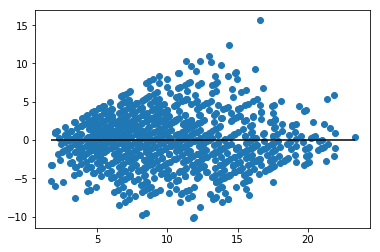

In [16]:
# Plot Residuals
plt.scatter(predictions_linear, predictions_linear - y)
plt.hlines(y=0, xmin=predictions_linear.min(), xmax=predictions_linear.max())
plt.show()

In [17]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X, y)
predictions_lasso = lasso.predict(X)
mse_lasso = mean_squared_error(y, predictions_lasso)
r2_lasso = lasso.score(X, y)

print(f"MSE: {mse_lasso}, R2: {r2_lasso}")

MSE: 12.278670697041264, R2: 0.6060024706656338


In [18]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge
### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X, y)
predictions_ridge = ridge.predict(X)
mse_ridge = mean_squared_error(y, predictions_ridge)
r2_ridge = ridge.score(X, y)
### END SOLUTION
print(f"MSE: {mse_ridge}, R2: {r2_ridge}")

MSE: 11.715423698986845, R2: 0.6240759194219324


In [19]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet
### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X, y)
predictions_elastic = elasticnet.predict(X)
mse_elastic = mean_squared_error(y, predictions_elastic)
r2_elastic = elasticnet.score(X, y)
### END SOLUTION
print(f"MSE: {mse_elastic}, R2: {r2_elastic}")

MSE: 12.344396715142485, R2: 0.6038934566376652


In [20]:
df2020 = pd.read_csv('2020.csv')
df2020_edited = df2020
df2020_edited.head()

,avg_daily_rate,Arrive_Date_Short,rate_type,reservation_date,reservation_date_short,reservation_no,reservation_weekday,room_no,room_type,total_nights,total_rate,Room Count
0,70,1/1/2020,Best Available Rate,2020-01-01,"01, January",1,Wednesday,210,Double,3,210,1
1,70,1/2/2020,Best Available Rate,2020-01-02,"02, January",2,Thursday,210,Double,3,210,1
2,70,1/3/2020,Best Available Rate,2020-01-03,"03, January",3,Friday,210,Double,3,210,1
3,70,1/4/2020,Best Available Rate,2020-01-04,"04, January",4,Saturday,210,Double,3,210,1
4,70,1/5/2020,Best Available Rate,2020-01-05,"05, January",5,Sunday,210,Double,3,210,1


In [21]:
df2020_edited[['reservation_day','reservation_month','reservation_year']] = df2020_edited['Arrive_Date_Short'].str.split('/', expand=True).astype(int)


df2020_edited['Month'] = pd.DatetimeIndex(df2020_edited['reservation_date']).month
df2020_edited['Week'] = pd.DatetimeIndex(df2020_edited['reservation_date']).week
df2020_edited['Quarter'] = pd.DatetimeIndex(df2020_edited['reservation_date']).quarter
df2020_edited['Season']=''

df2020_edited.loc[df2020_edited.Month == 12, ['Season']] = 'Winter'
df2020_edited.loc[df2020_edited.Month == 1, ['Season']] = 'Winter'
df2020_edited.loc[df2020_edited.Month == 2, ['Season']] = 'Winter'

df2020_edited.loc[df2020_edited.Month == 3, ['Season']] = 'Spring'
df2020_edited.loc[df2020_edited.Month == 4, ['Season']] = 'Spring'
df2020_edited.loc[df2020_edited.Month == 5, ['Season']] = 'Spring'

df2020_edited.loc[df2020_edited.Month == 6, ['Season']] = 'Summer'
df2020_edited.loc[df2020_edited.Month == 7, ['Season']] = 'Summer'
df2020_edited.loc[df2020_edited.Month == 8, ['Season']] = 'Summer'

df2020_edited.loc[df2020_edited.Month == 9, ['Season']] = 'Fall'
df2020_edited.loc[df2020_edited.Month == 10, ['Season']] = 'Fall'
df2020_edited.loc[df2020_edited.Month == 11, ['Season']] = 'Fall'

df2020_edited.head()

,avg_daily_rate,Arrive_Date_Short,rate_type,reservation_date,reservation_date_short,reservation_no,reservation_weekday,room_no,room_type,total_nights,total_rate,Room Count,reservation_day,reservation_month,reservation_year,Month,Week,Quarter,Season
0,70,1/1/2020,Best Available Rate,2020-01-01,"01, January",1,Wednesday,210,Double,3,210,1,1,1,2020,1,1,1,Winter
1,70,1/2/2020,Best Available Rate,2020-01-02,"02, January",2,Thursday,210,Double,3,210,1,1,2,2020,1,1,1,Winter
2,70,1/3/2020,Best Available Rate,2020-01-03,"03, January",3,Friday,210,Double,3,210,1,1,3,2020,1,1,1,Winter
3,70,1/4/2020,Best Available Rate,2020-01-04,"04, January",4,Saturday,210,Double,3,210,1,1,4,2020,1,1,1,Winter
4,70,1/5/2020,Best Available Rate,2020-01-05,"05, January",5,Sunday,210,Double,3,210,1,1,5,2020,1,1,1,Winter


In [22]:
df2020_edited.drop(['Arrive_Date_Short','reservation_year','reservation_month','reservation_day'], axis=1, inplace=True)
df2020_edited.head()

,avg_daily_rate,rate_type,reservation_date,reservation_date_short,reservation_no,reservation_weekday,room_no,room_type,total_nights,total_rate,Room Count,Month,Week,Quarter,Season
0,70,Best Available Rate,2020-01-01,"01, January",1,Wednesday,210,Double,3,210,1,1,1,1,Winter
1,70,Best Available Rate,2020-01-02,"02, January",2,Thursday,210,Double,3,210,1,1,1,1,Winter
2,70,Best Available Rate,2020-01-03,"03, January",3,Friday,210,Double,3,210,1,1,1,1,Winter
3,70,Best Available Rate,2020-01-04,"04, January",4,Saturday,210,Double,3,210,1,1,1,1,Winter
4,70,Best Available Rate,2020-01-05,"05, January",5,Sunday,210,Double,3,210,1,1,1,1,Winter


In [23]:
df2020_2 = df2020_edited.groupby('reservation_date').agg({'Room Count':'sum', 'reservation_weekday':'first', 'avg_daily_rate':'mean','Month':'mean','Week':'mean', 'Quarter':'mean', 'Season':'first', 'avg_daily_rate': 'mean'})
df2020_2.head()

,Room Count,reservation_weekday,avg_daily_rate,Month,Week,Quarter,Season
reservation_date,,,,,,,
2020-01-01,1,Wednesday,70,1,1,1,Winter
2020-01-02,1,Thursday,70,1,1,1,Winter
2020-01-03,1,Friday,70,1,1,1,Winter
2020-01-04,1,Saturday,70,1,1,1,Winter
2020-01-05,1,Sunday,70,1,1,1,Winter


In [24]:
df2020_2 = pd.get_dummies(df2020_2, columns=['reservation_weekday', 'Month', 'Week', 'Quarter','Season'])
df2020_2.head()

,Room Count,avg_daily_rate,reservation_weekday_Friday,reservation_weekday_Monday,reservation_weekday_Saturday,reservation_weekday_Sunday,reservation_weekday_Thursday,reservation_weekday_Tuesday,reservation_weekday_Wednesday,Month_1,...,Week_52,Week_53,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Season_Fall,Season_Spring,Season_Summer,Season_Winter
reservation_date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1,70,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
2020-01-02,1,70,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2020-01-03,1,70,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2020-01-04,1,70,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2020-01-05,1,70,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [25]:
X2020 = df2020_2[["reservation_weekday_Monday", "reservation_weekday_Tuesday", "reservation_weekday_Wednesday","reservation_weekday_Thursday", "reservation_weekday_Friday", "reservation_weekday_Saturday","reservation_weekday_Sunday","Month_1","Month_2","Month_3","Month_4", "Month_5","Month_6","Month_7","Month_8","Month_9","Month_10", "Month_11","Month_12",'Week_1','Week_2','Week_3','Week_4','Week_5','Week_6','Week_7','Week_8','Week_9','Week_10','Week_11','Week_12','Week_13','Week_14','Week_15','Week_16','Week_17','Week_18','Week_19','Week_20','Week_21','Week_22','Week_23','Week_24','Week_25','Week_26','Week_27','Week_28','Week_29','Week_30','Week_31','Week_32','Week_33','Week_34','Week_35','Week_36','Week_37','Week_38','Week_39','Week_40','Week_41','Week_42','Week_43','Week_44','Week_45','Week_46','Week_47','Week_48','Week_49','Week_50','Week_51','Week_52','Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Season_Fall','Season_Spring','Season_Summer','Season_Winter','avg_daily_rate']]
y2020 = df2020_2["Room Count"].values.reshape(-1, 1)
print(X2020.shape, y2020.shape)

(366, 80) (366, 1)


In [26]:
y2020_predict= model_linear.predict(X2020)
y2020_predict

array([[1.05900116e+01],
       [1.06184235e+01],
       [1.26319427e+01],
       [1.39015656e+01],
       [8.33103943e+00],
       [1.01969147e+01],
       [1.13193817e+01],
       [1.19334869e+01],
       [1.19618988e+01],
       [1.39754181e+01],
       [1.52450409e+01],
       [9.67451477e+00],
       [1.11502838e+01],
       [1.22727509e+01],
       [1.28868561e+01],
       [1.29152679e+01],
       [1.49287872e+01],
       [1.61984100e+01],
       [1.06278839e+01],
       [1.10643158e+01],
       [1.21867523e+01],
       [1.28008881e+01],
       [1.28292694e+01],
       [1.48428192e+01],
       [1.61124115e+01],
       [1.05419159e+01],
       [1.35504913e+01],
       [1.46729584e+01],
       [1.52870636e+01],
       [1.53154755e+01],
       [1.73289948e+01],
       [1.75663300e+01],
       [1.19958038e+01],
       [1.04308319e+01],
       [1.15532990e+01],
       [1.21674042e+01],
       [1.21958160e+01],
       [1.42093353e+01],
       [1.54789581e+01],
       [9.90843201e+00],


In [27]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# y2020_predict

In [28]:
df2020_2['Predicted']= model_linear.predict(X2020)
pd.options.display.float_format = '{:,.0f}'.format
df2020_2.to_csv('df2020_2.csv')
df2020_2

,Room Count,avg_daily_rate,reservation_weekday_Friday,reservation_weekday_Monday,reservation_weekday_Saturday,reservation_weekday_Sunday,reservation_weekday_Thursday,reservation_weekday_Tuesday,reservation_weekday_Wednesday,Month_1,...,Week_53,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Predicted
reservation_date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1,70,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,11
2020-01-02,1,70,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,11
2020-01-03,1,70,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,13
2020-01-04,1,70,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,14
2020-01-05,1,70,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,8
2020-01-06,1,70,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,10
2020-01-07,1,70,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,11
2020-01-08,1,70,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,12
2020-01-09,1,70,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,12
